# Introduction
<hr style="border:2px solid black"> </hr>

In [ ]:
"""
What? Prediction interval for linear regression

A prediction interval is DIFFERENT from a confidence interval. 
A confidence interval quantifies the uncertainty on an estimated 
population variable, such as the mean or standard deviation. 
Whereas a prediction interval quantifies the uncertainty on a
single observation estimated from the population.

In predictive modeling, a confidence interval can be used to 
quantify the uncertainty of the estimated skill of a model,
whereas a prediction interval can be used to quantify the 
uncertainty of a single forecast.
"""

# Import modules

In [3]:
from numpy import mean, std, sum, sqrt
from matplotlib import pyplot
from numpy.random import seed
from numpy.random import randn
from scipy.stats import linregress
from IPython.display import Markdown, display

Generate two linearly dependent variables
x: mean=100.776 stdv=19.620
y: mean=151.050 stdv=22.358


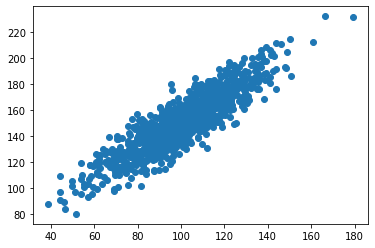

In [4]:
print("Generate two linearly dependent variables")
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# summarize
print('x: mean=%.3f stdv=%.3f' % (mean(x), std(x))) 
print('y: mean=%.3f stdv=%.3f' % (mean(y), std(y))) # plot
pyplot.scatter(x, y)
pyplot.show()

Fit linear regression model
Coefficients: b0=1.011, b1=49.117


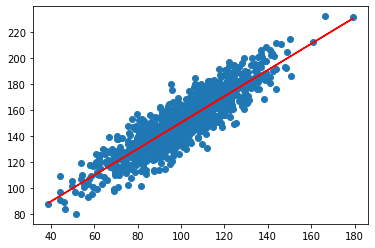

In [5]:
print("Fit linear regression model")
b1, b0, r_value, p_value, std_err = linregress(x, y) 
print('Coefficients: b0=%.3f, b1=%.3f' % (b1, b0))
# make prediction
yhat = b0 + b1 * x
# plot data and predictions
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color = 'r')
pyplot.show()

Linear regression prediction with prediction interval
Prediction Interval: 20.204
95% likelihood that the true value is between 160.750 and 201.159
True value: 183.124


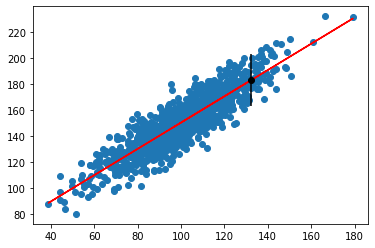

In [6]:
print("Linear regression prediction with prediction interval")

# define new input, expected value and prediction
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]

# estimate stdev of yhat
sum_errs = sum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = y_out - interval, y_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper)) 
print('True value: %.3f' % yhat_out)

# Plot dataset and prediction with interval
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()